## **Ejercicio1**

Un instituto educativo está interesado en desarrollar un modelo que pueda **predecir si un estudiante tendrá un bajo rendimiento académico al final del año escolar**. El objetivo es identificar estudiantes que podrían necesitar apoyo adicional basado en una serie de características personales y académica.

El dataset contiene información sobre estudiantes en dos cursos de educación secundaria: Matemáticas y Portugués. Para este caso, **trabajaremos con los datos del curso de matemáticas. El objetivo es predecir si el estudiante aprobará o no el curso (clasificación binaria).**

Las características principales son:
- school: Escuela del estudiante (binary: "GP" o "MS").
- sex: Género del estudiante (binary: "F" = femenino o "M" = masculino).
- age: Edad del estudiante.
- address: Tipo de dirección (binary: "U" = urbana o "R" = rural).
- famsize: Tamaño de la familia (binary: "LE3" = menos o igual a 3, "GT3" = más de 3).
- Pstatus: Estado de cohabitación de los padres (binary: "T" = juntos, "A" = separados).
- Medu: Educación de la madre (numeric: 0 = sin educación, 1 = educación primaria, 2 = secundaria, 3 = terciaria, 4 = universitaria).
- Fedu: Educación del padre (numeric: 0 a 4).
- traveltime: Tiempo de viaje desde casa a la escuela (numeric: 1 = <15 min, 2 = 15-30 min, 3 = 30-60 min, 4 = >60 min).
- studytime: Tiempo semanal de estudio (numeric: 1 = <2 horas, 2 = 2-5 horas, 3 = 5-10 horas, 4 = >10 horas).
- failures: Número de clases fallidas (numeric: n si 1<=n<=3, más de 3 es 4).
- famsup: Apoyo educativo familiar (binary: yes o no).
- paid: Clases extras de pago (binary: yes o no).
- G1, G2, G3: Calificaciones obtenidas en los períodos 1, 2 y la calificación final (0-20).

Para este caso, nuestro objetivo (target) será clasificar a los estudiantes en dos grupos:
- Aprobado: G3 >= 10.
- Reprobado: G3 < 10.

## 🎯 Objetivo del modelo

El objetivo es **predecir si un estudiante reprobará el curso** para poder intervenir y ofrecer apoyo adicional.

---

## ❓ ¿Qué métrica deberíamos priorizar?

Para este problema, es importante entender qué tipo de error es más costoso:

| Tipo de Error        | Significado                                                        | Gravedad |
|----------------------|---------------------------------------------------------------------|----------|
| **Falso Negativo**   | El modelo predice que el estudiante aprobará, pero en realidad reprueba. | 🔴 Grave: **no se le brinda apoyo a quien lo necesita.** |
| **Falso Positivo**   | El modelo predice que el estudiante reprobará, pero aprueba.             | 🟠 Menos grave: **se brinda apoyo adicional, aunque no era necesario.** |

---

## ✅ Conclusión: Usar `recall` como métrica principal

> Es preferible **identificar todos los estudiantes en riesgo de bajo rendimiento**, aunque eso implique ayudar a algunos que no lo necesitan tanto.

Por lo tanto, **optamos por maximizar el `recall`**, ya que queremos minimizar los **falsos negativos**.



In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [702]:
df_estudiantes = pd.read_csv("/Users/lolonastri/Desktop/IA_UCEMA/parciales/primer_parcial/data/student-mat.csv", delimiter=";")
#df_estudiantes = df_estudiantes[df_estudiantes["school"] == "MS"]
df_estudiantes

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


---

## **Parte 1: Comprensión y Preparación de Datos**

### → Validación de la data

In [703]:
print("El dataset tiene" , df_estudiantes.shape[0], "filas y", df_estudiantes.shape[1], "columnas")

El dataset tiene 395 filas y 33 columnas


In [704]:
df_estudiantes.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [705]:
from funciones.funciones import validate_columns
validate_columns(df_estudiantes)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
school,2,395,0,0.0,"[GP, GP, MS, GP, GP]"
sex,2,395,0,0.0,"[M, F, M, F, M]"
age,NaN,395.0,0,0.0,"[15, 18, 17, 16, 16]"
address,2,395,0,0.0,"[U, U, U, U, U]"
famsize,2,395,0,0.0,"[GT3, GT3, LE3, GT3, GT3]"
Pstatus,2,395,0,0.0,"[T, T, T, T, T]"
Medu,NaN,395.0,0,0.0,"[3, 2, 3, 2, 3]"
Fedu,NaN,395.0,0,0.0,"[4, 4, 1, 3, 3]"
Mjob,5,395,0,0.0,"[other, services, services, services, services]"
Fjob,5,395,0,0.0,"[other, at_home, services, teacher, other]"


In [706]:
df_estudiantes.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


---

### →  Veo los tipos de datos con dtypes

In [707]:
df_estudiantes.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [708]:
for col in df_estudiantes.columns:
    print(f"Value counts for {col}:")
    print(df_estudiantes[col].value_counts())
    print("\n")

Value counts for school:
school
GP    349
MS     46
Name: count, dtype: int64


Value counts for sex:
sex
F    208
M    187
Name: count, dtype: int64


Value counts for age:
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64


Value counts for address:
address
U    307
R     88
Name: count, dtype: int64


Value counts for famsize:
famsize
GT3    281
LE3    114
Name: count, dtype: int64


Value counts for Pstatus:
Pstatus
T    354
A     41
Name: count, dtype: int64


Value counts for Medu:
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64


Value counts for Fedu:
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64


Value counts for Mjob:
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64


Value counts for Fjob:
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int6

---

### → Valores outliers

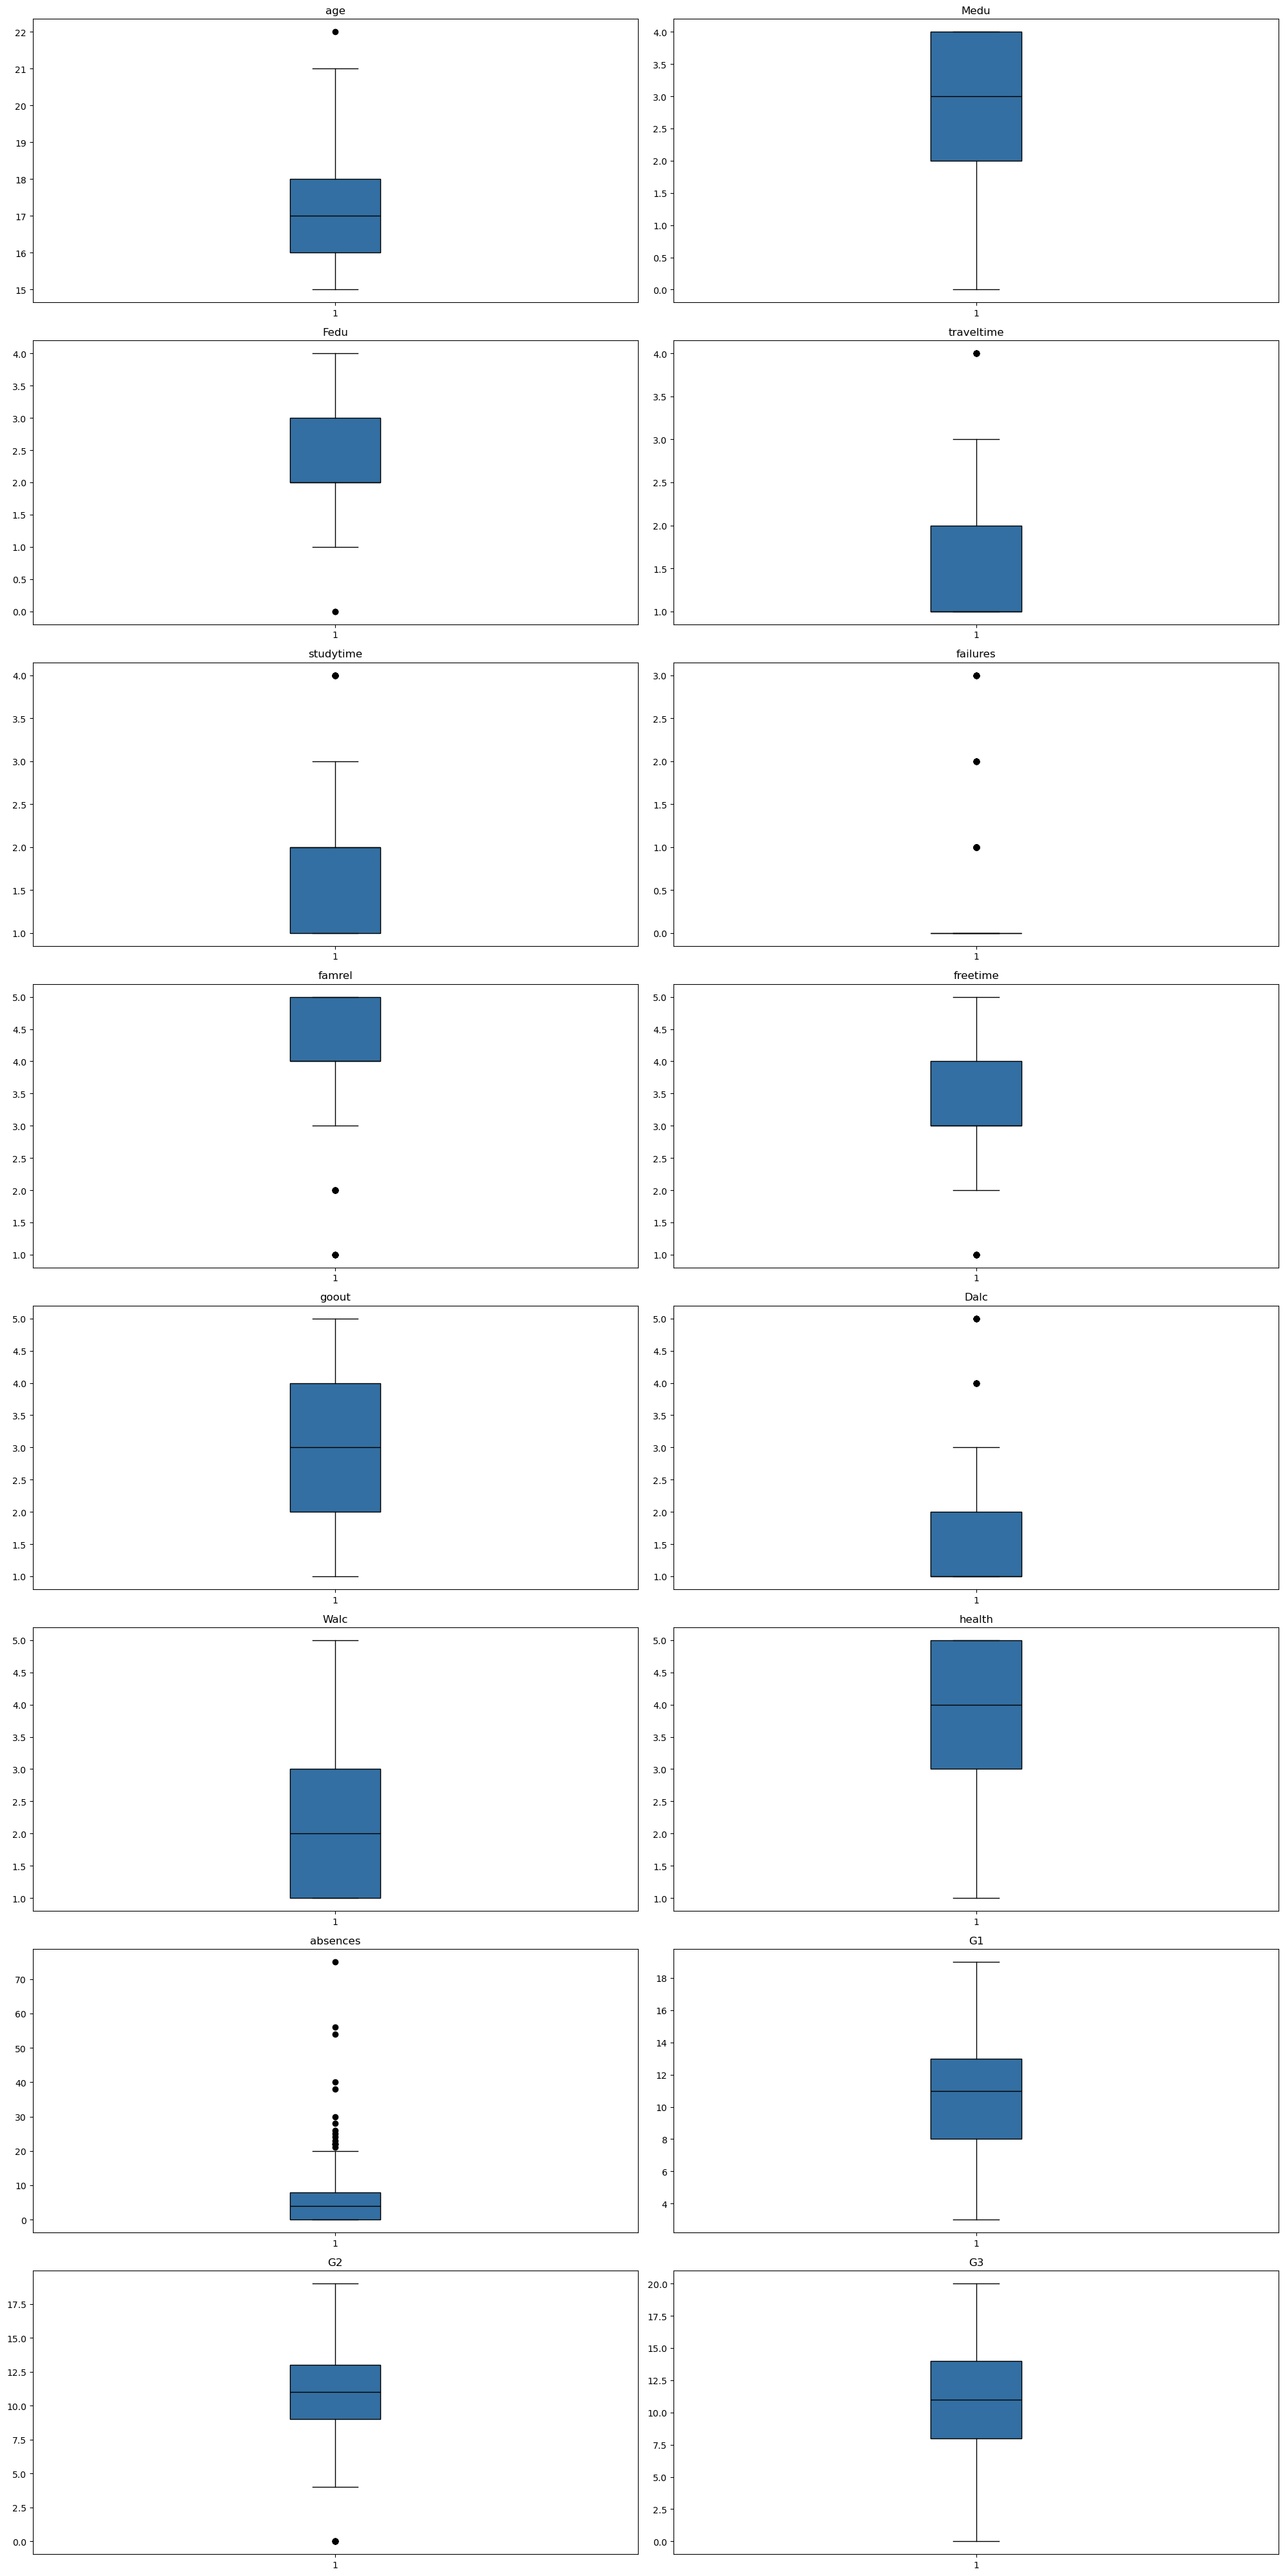

In [709]:
from funciones.funciones import plot_outliers
plot_outliers(df_estudiantes)

#### Para este análisis he tomado la decisión de no remover los outliers, ya que son valores que pueden ser reales y no errores de carga de datos.

In [710]:
#from funciones.funciones import reconocimiento_de_outliers
#outliers_age, outlier_values_age = reconocimiento_de_outliers(df_casas, "age", 4.5)

In [711]:
'''
def remove_outliers(df, column, outliers):
    if column in df.columns:
        df = df.drop(df[df[column].isin(outliers)].index)
    return df
'''

'\ndef remove_outliers(df, column, outliers):\n    if column in df.columns:\n        df = df.drop(df[df[column].isin(outliers)].index)\n    return df\n'

In [712]:
#df_casas = remove_outliers(df_casas, "age", outlier_values_age)

---

## **Parte 2: Análisis Exploratorio de Datos**


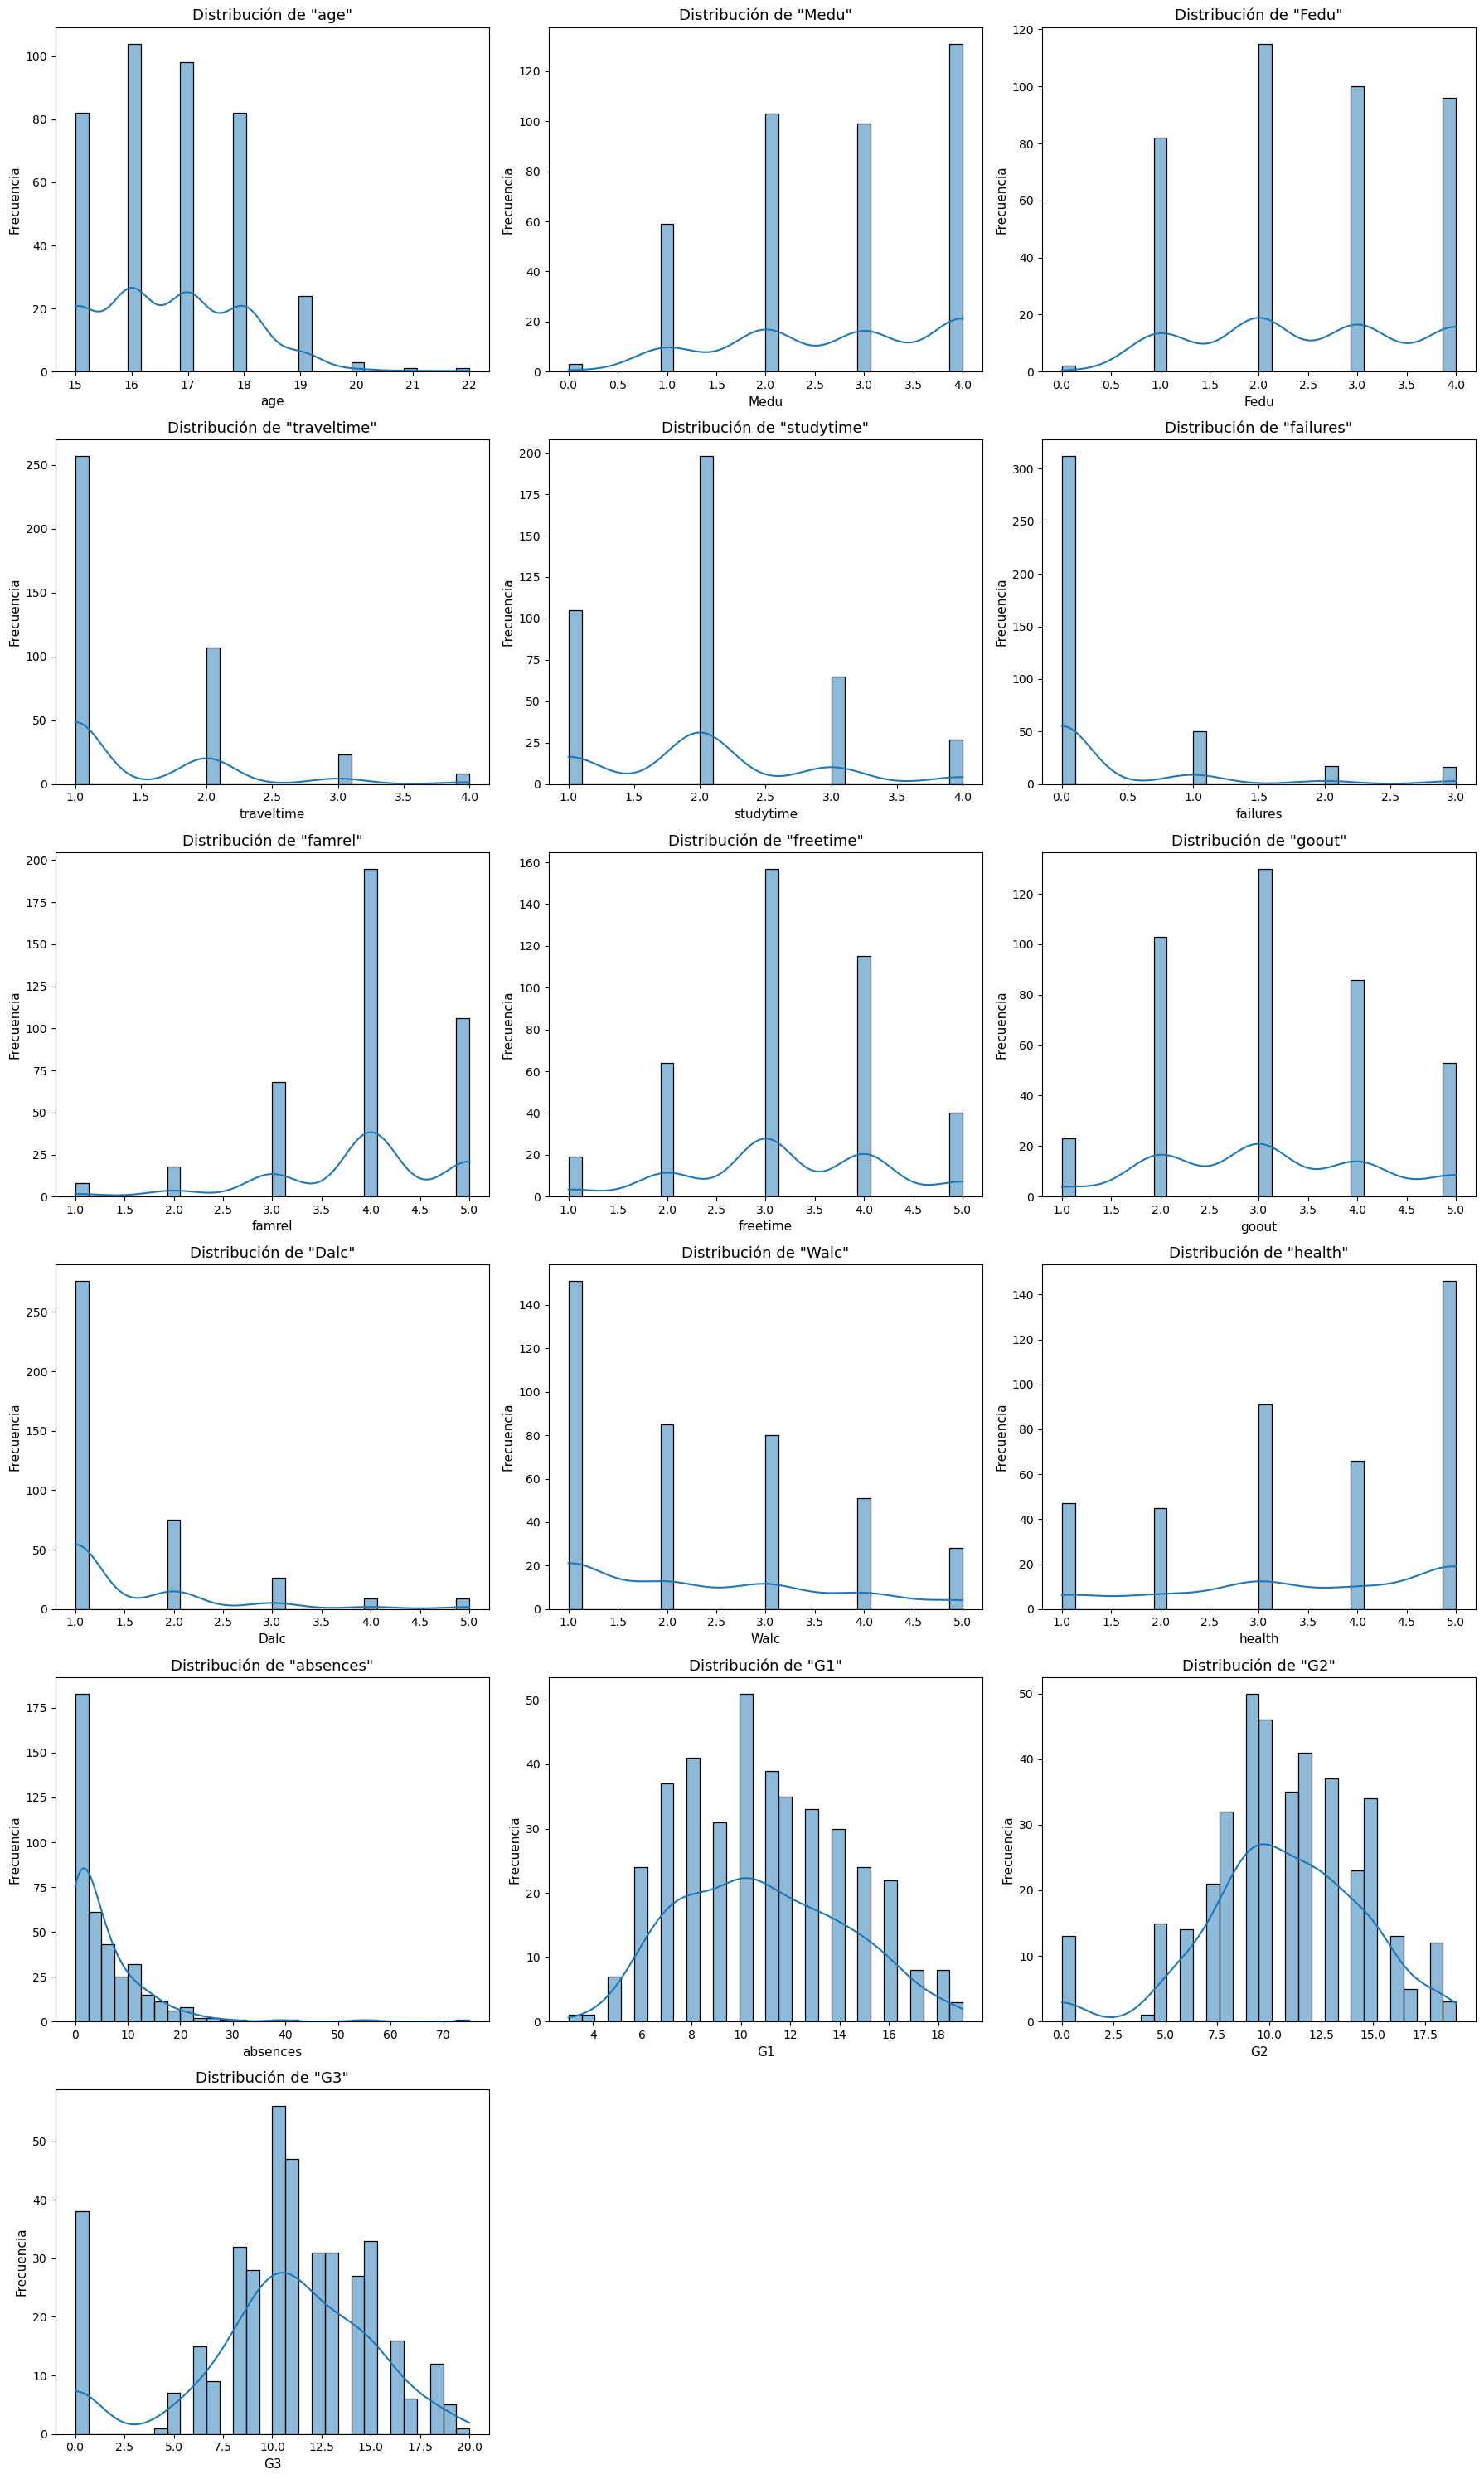

In [713]:
import math
numerical_vars = df_estudiantes.select_dtypes(include=['int64', 'float64']).columns

# Cantidad de gráficos y configuración de grilla
num_vars = len(numerical_vars)
cols = 3
rows = math.ceil(num_vars / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Aplanar la grilla para recorrer fácilmente

# Generar cada histograma
for i, col in enumerate(numerical_vars):
    sns.histplot(df_estudiantes[col], kde=True, bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribución de "{col}"', fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Frecuencia", fontsize=11)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 📊 Conclusiones sobre la distribución de variables numéricas

### 🎓 `age` (Edad del estudiante)
- Predominio de estudiantes de **17 y 18 años**.
- Distribución sesgada a la derecha, con muy pocos estudiantes mayores de 19.

### 👩‍🎓 `Medu` y `Fedu` (Nivel educativo de madre y padre)
- Mayor concentración en los valores **1 (primaria)** y **2 (secundaria)**.
- Niveles universitarios (`4`) son menos frecuentes.
- Muestra un nivel educativo **bajo a medio** predominante en los hogares.

### 🚶‍♂️ `traveltime` (Tiempo de viaje a la escuela)
- La mayoría vive cerca de la escuela (**<15 minutos**).
- Pocos casos con tiempos de viaje superiores a 30 minutos.

### 📖 `studytime` (Tiempo de estudio semanal)
- La mayoría de los estudiantes estudia entre **2 a 5 horas por semana**.
- Muy pocos superan las 10 horas.

### 📉 `failures` (Cantidad de materias reprobadas)
- Distribución altamente sesgada: la mayoría no ha reprobado ninguna materia.
- Pocos estudiantes tienen 2 o más materias reprobadas.

### 👨‍👩‍👧 `famrel` (Relación familiar)
- Altos valores indican **relaciones familiares positivas** (mayoría entre 4 y 5).
- Muy pocos estudiantes reportan relaciones familiares conflictivas.

### 🕒 `freetime`, 🕺 `goout`, 🍻 `Dalc`, 🍷 `Walc`
- Distribución bastante uniforme entre los niveles 2 a 4.
- El consumo de alcohol durante la semana (`Dalc`) es bajo en la mayoría, pero sube los fines de semana (`Walc`).
- Sugerencia de comportamientos sociales moderados.

### ❤️ `health` (Estado de salud percibido)
- Distribución balanceada, con leve concentración en los niveles intermedios (3-4).
- Pocos estudiantes se perciben con salud muy mala (1) o excelente (5).

### 🚫 `absences` (Inasistencias)
- Distribución fuertemente sesgada a la derecha.
- La mayoría de los estudiantes tiene pocas faltas, pero existen **outliers** con muchas ausencias.

### 📝 `G1`, `G2`, `G3` (Notas de los tres trimestres)
- Notas mayormente concentradas entre **8 y 15 puntos**, con forma casi normal.
- Las distribuciones muestran coherencia entre los tres periodos.
- Potencial alta correlación entre estas variables, lo que podría introducir **fuga de información** en el modelo si no se tratan adecuadamente.


### → Análisis de sesgos por edad. Usa groupby para calcular la tasa de retiro promedio por grupo de edad. 

In [714]:
edades = sorted(df_estudiantes['age'].unique())
print(edades)

[15, 16, 17, 18, 19, 20, 21, 22]


In [715]:
def aprobacion(x):
    if x < 10:
        return "reprobado"
    else:
        return "aprobado"

df_estudiantes["aprobacion"] = df_estudiantes["G3"].apply(aprobacion)

In [716]:
aprobacion_por_edad = df_estudiantes.groupby("aprobacion").agg({"age" : "count"}).reset_index()
aprobacion_por_edad

,aprobacion,age
0,aprobado,265
1,reprobado,130


### `Distribución general de la variable aprobacion`

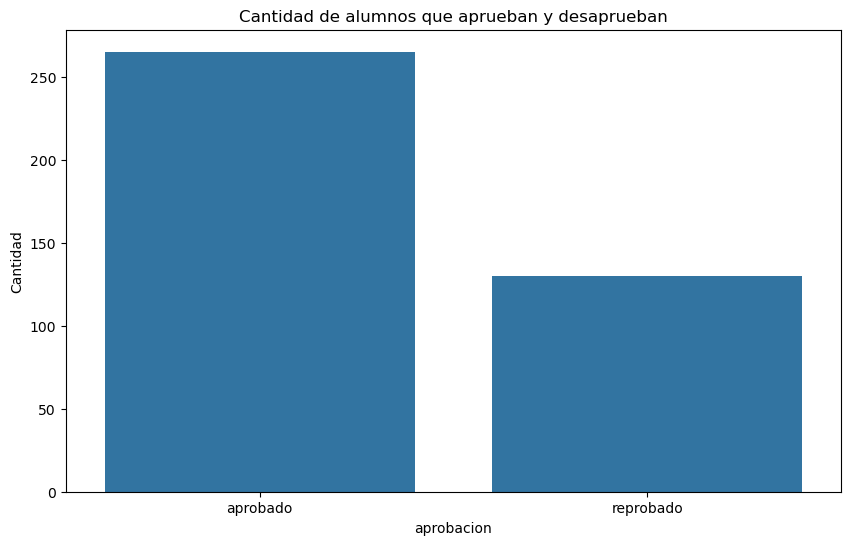

In [717]:
plt.figure(figsize=(10,6))
sns.barplot(data=aprobacion_por_edad, x="aprobacion", y="age")
plt.title("Cantidad de alumnos que aprueban y desaprueban")
plt.ylabel("Cantidad")
plt.show()

### `Análisis por variables categóricas (satisfacción, desempeño, balance)`

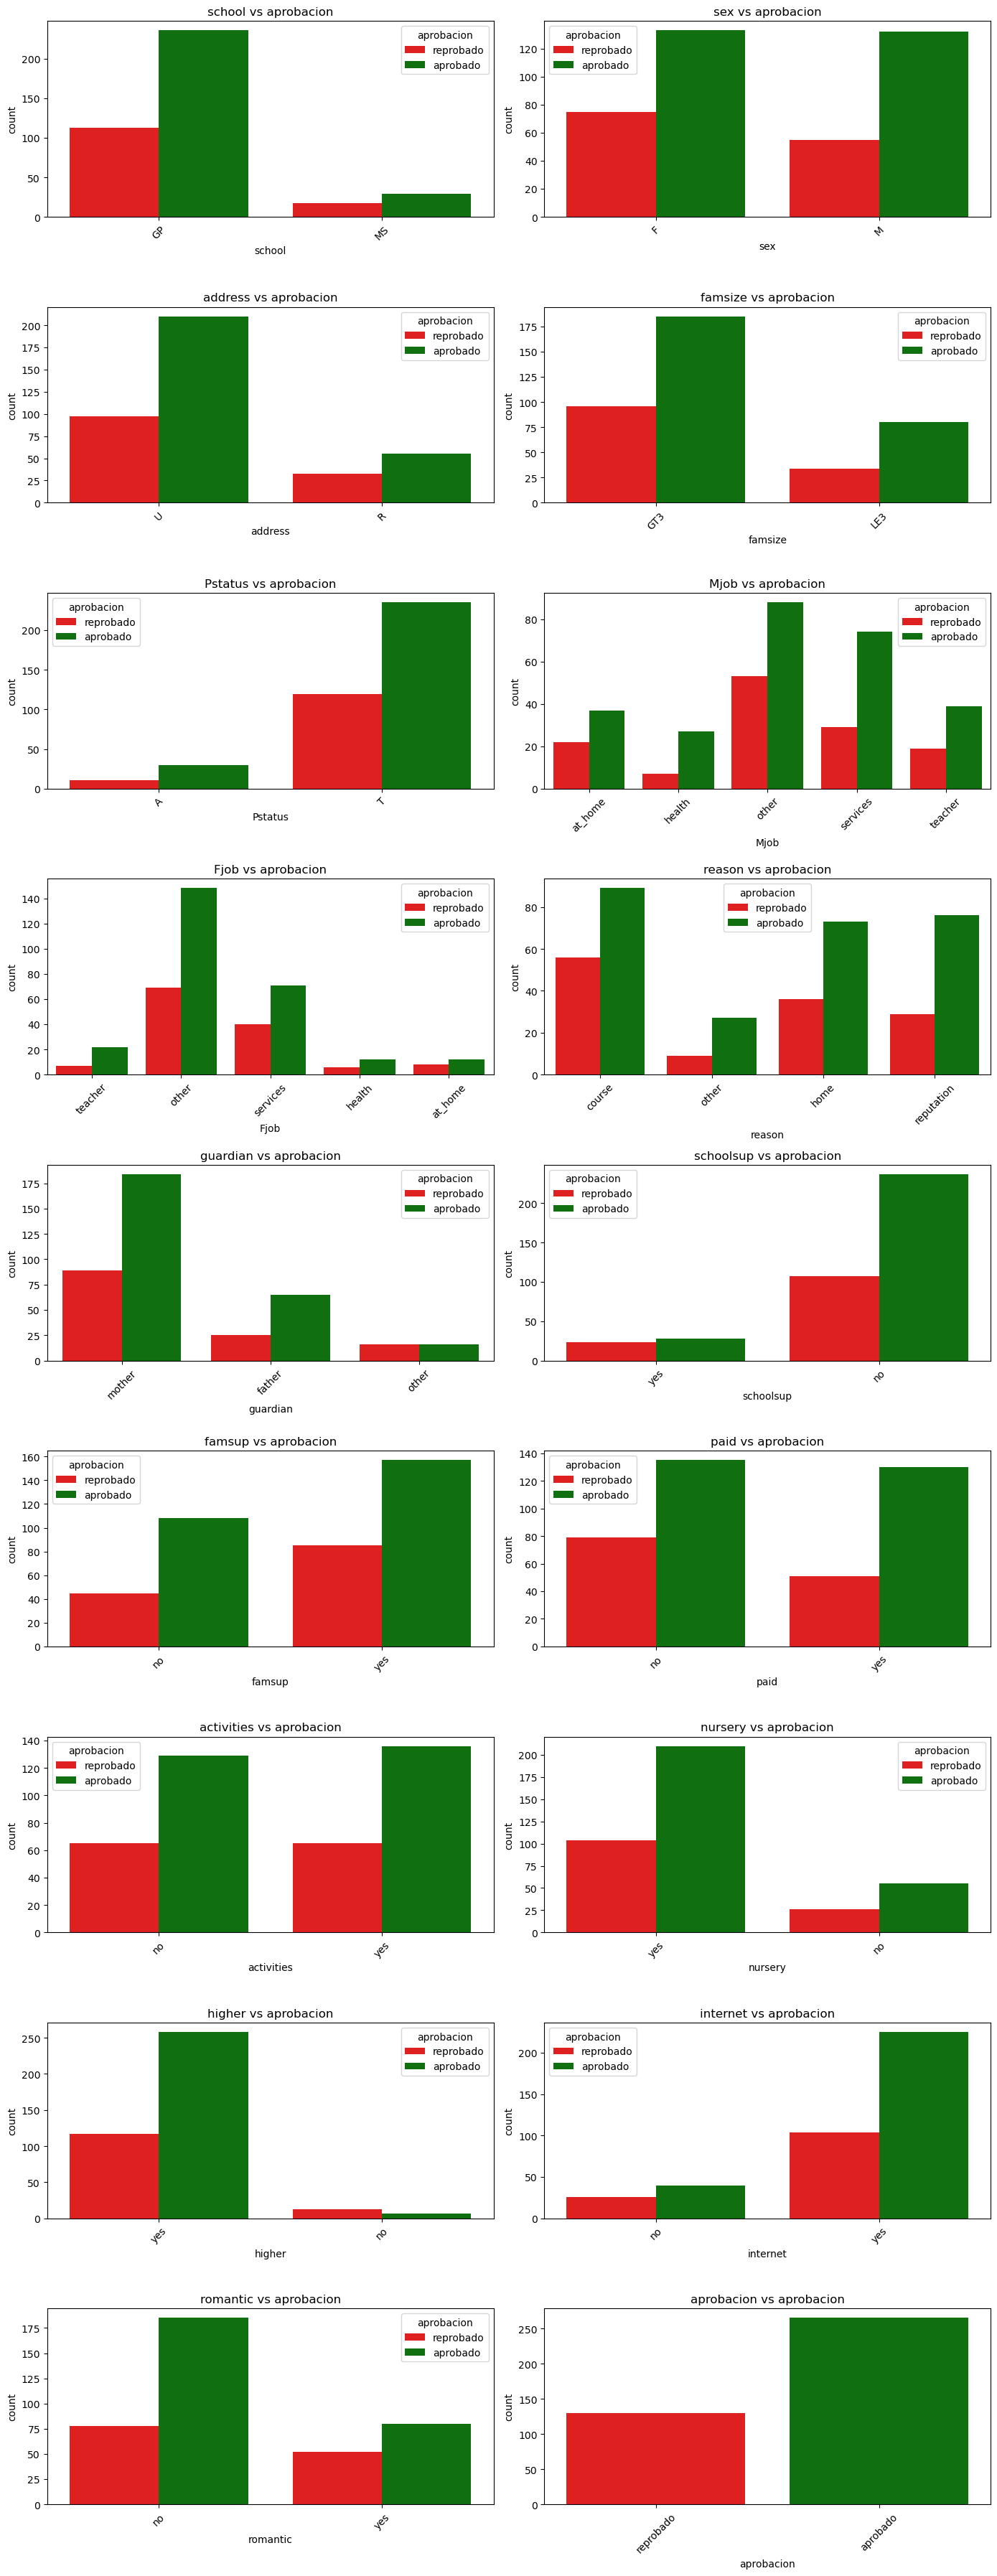

In [718]:
import math

categoricas = df_estudiantes.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {'reprobado': 'red', 'aprobado': 'green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_estudiantes, x=col, hue='aprobacion', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs aprobacion')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 📌 Conclusión

Con base en el análisis realizado, los estudiantes que **aprueban** tienden a presentar ciertos patrones en características personales, familiares y académicas que los distinguen de quienes **reprueban**. A continuación, se resumen las principales tendencias observadas:

| **Columna (Característica)** | **Tendencia en estudiantes que aprueban** |
|------------------------------|-------------------------------------------|
| 🏫 `school`                  | Más frecuente en la escuela **MS**        |
| 👩‍🎓 `sex`                   | Ligeramente mayor aprobación en **mujeres** |
| 🏠 `address`                | Mayor aprobación en zonas **rurales (R)** |
| 👨‍👩‍👧 `famsize`            | Leve ventaja en familias **grandes (GT3)** |
| 💔 `Pstatus`                | Mayor aprobación cuando los padres están **juntos (T)** |
| 🧑‍⚕️ `Mjob` / `Fjob`        | Padres con trabajos en **servicios, salud o enseñanza** tienden a tener hijos que aprueban más |
| 🧭 `reason`                 | Elegir la escuela por el **curso académico** se asocia más con la aprobación |
| 👩‍👦 `guardian`             | Leve mayor éxito cuando el tutor principal es la **madre** |
| 🎓 `schoolsup`              | Menor tasa de aprobación cuando reciben **apoyo escolar adicional** (posible relación inversa) |
| 👪 `famsup`                 | Ligera ventaja sin apoyo familiar adicional |
| 💸 `paid`                   | Aprobación levemente mayor sin clases pagas |
| 🎯 `activities`             | Actividades extracurriculares correlacionan con **mejores resultados** |
| 👶 `nursery`                | Mayor proporción de aprobación en quienes **fueron al jardín** |
| 🎓 `higher`                 | Alta correlación entre querer seguir estudios superiores y **aprobar** |
| 🌐 `internet`              | Acceso a internet se asocia con mayor rendimiento |
| 💑 `romantic`              | Estudiantes sin relación romántica tienen una leve ventaja |

Estas observaciones sugieren que el **contexto familiar, el acceso a recursos y la motivación académica** son factores clave en el rendimiento escolar. También es interesante notar que recibir apoyo adicional no garantiza la aprobación, posiblemente porque este apoyo ya está orientado a quienes presentan dificultades.


---

## **Parte 3: Preparación de Datos para Modelado**


### → Selección de Características. Decido qué variables incluir en el modelo. Considero excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [719]:
df_estudiantes.select_dtypes(include=['object']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'aprobacion'],
      dtype='object')

In [720]:
binarias = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
            'higher', 'internet', 'romantic']
for col in binarias:
    df_estudiantes[col] = df_estudiantes[col].map({'yes': 1, 'no': 0})

In [721]:
df_estudiantes["target"] = df_estudiantes["aprobacion"].map({"reprobado": 0, "aprobado": 1})

In [722]:
df_estudiantes = df_estudiantes.drop(['aprobacion'], axis=1)

In [723]:
categoricas = ['school', 'sex', 'address', 'famsize', 'Pstatus', 
               'Mjob', 'Fjob', 'reason', 'guardian']
df_estudiantes = pd.get_dummies(df_estudiantes, columns=categoricas)

In [724]:
df_estudiantes = df_estudiantes.replace({True: 1, False: 0})

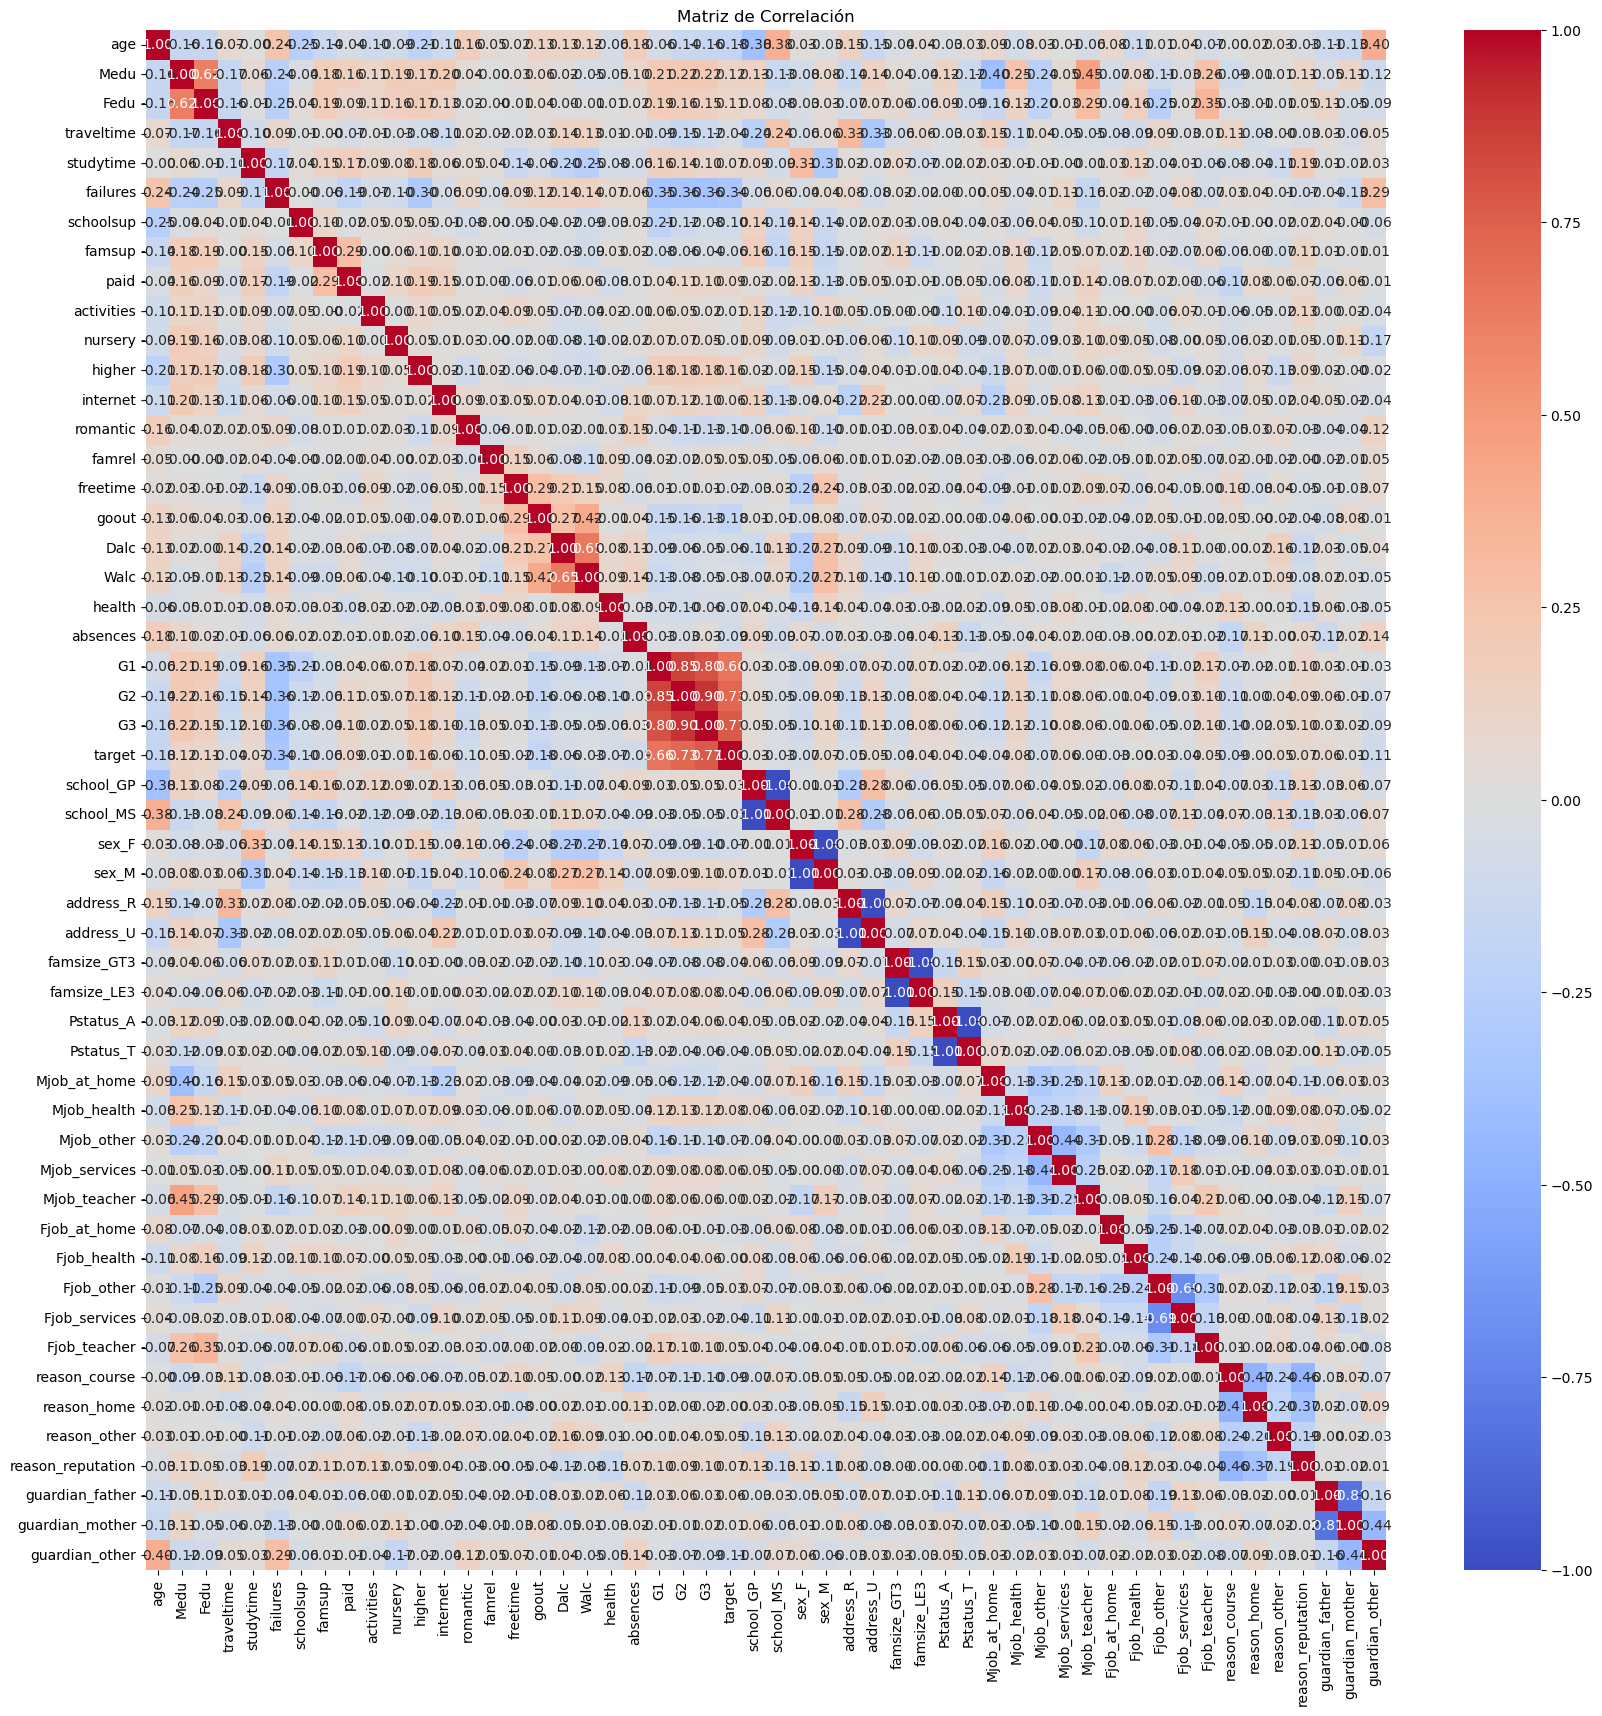

In [725]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_estudiantes.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [726]:
df_estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   schoolsup          395 non-null    int64
 7   famsup             395 non-null    int64
 8   paid               395 non-null    int64
 9   activities         395 non-null    int64
 10  nursery            395 non-null    int64
 11  higher             395 non-null    int64
 12  internet           395 non-null    int64
 13  romantic           395 non-null    int64
 14  famrel             395 non-null    int64
 15  freetime           395 non-null    int64
 16  goout              395 non-null    int64
 17  Dalc            

In [727]:
##from scipy import stats
## df_casas = df_casas[(np.abs(stats.zscore(df_casas["price"])) < 3)]

---

## **Parte 4: Modelado**


In [728]:
# Separo mi df en X e Y
X = df_estudiantes.drop(columns=['target', 'G1', 'G2', 'G3'], axis=1)
y = df_estudiantes['target']

# Separo en train y test con 0.2 en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Para mantener la distribución de la variable objetivo
    random_state=42
)

##### ¿Está balanceado mi dataset?

In [729]:
# Contar la cantidad de valores de cada clase
counts = y.value_counts()

# Calcular la proporción de cada clase
prop = counts / counts.sum()

# Imprimir los resultados
print("Número de muestras por clase:\n", counts)
print("\nProporción de muestras por clase:\n", prop)


Número de muestras por clase:
 target
1    265
0    130
Name: count, dtype: int64

Proporción de muestras por clase:
 target
1    0.670886
0    0.329114
Name: count, dtype: float64


##### Sí. Claramente este dataset esta desbalanceado, por lo tanto vamos a necesitar usar un metodo de balanceo de clases.

In [730]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [731]:
# Funciones que utilizaré al trabajar con mi modelo
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import scipy.stats as st

from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
def model_trial(model, parameters):
    np.random.seed(42)

    # Definimos los 5 splits (cv) para mantener la proporción de clases
    kf = StratifiedKFold(n_splits=5, shuffle=False)

    # Definimos el pipeline
    pipe = Pipeline(steps=[
        ('sampler', 'passthrough'),  # Balanceo de clases
        #('imputer', SimpleImputer(strategy='median')),  # Imputación de valores faltantes
        ('scaler', StandardScaler()),  # Escalado de variables numericas
        ('selector', SelectKBest(f_classif)),  # Selección de k características mejores
        ('classifier', model)  # Modelo
    ])


    # Hiperparámetros + opciones de balanceo
    full_param_grid = {
        'sampler': ['passthrough', SMOTE(), RandomOverSampler(), SMOTEENN(), SMOTETomek()], # estrategias de balanceo de clases
        'selector__k': [10, 15, 20, 25, 30, 35],
        **parameters # parametros propios de clasificador
    }

    # RandomizedSearchCV con scoring basado en recall (quiero optimizar esa métrica)
    grid = RandomizedSearchCV(pipe, full_param_grid, cv=kf, scoring='recall')
    grid.fit(X_train, y_train)

    # Obtenemos el mejor modelo
    best_params = grid.best_params_
    best_model = grid.best_estimator_
    best_score = grid.best_score_

    # Métricas de entrenamiento
    y_train_pred = best_model.predict(X_train)
    auc_roc_train = roc_auc_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)

    # Métricas de test
    y_pred = best_model.predict(X_test)
    auc_roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Prints
    print(f"Mejores parámetros: {best_params}")
    print(f"AUC-ROC Train: {auc_roc_train} and AUC-ROC Test: {auc_roc}")
    print(f"F1-Score Train: {f1_train} and F1-Score Test: {f1}")
    print(f"Precision Train: {precision_train} and Precision Test: {precision}")
    print(f"Recall-Score Train: {recall_train} and Recall-Score Test: {recall}")
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

    return recall, auc_roc, f1, precision, best_model, recall_train, auc_roc_train, f1_train, precision_train, best_params


---

## **Logistic Regresion**

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


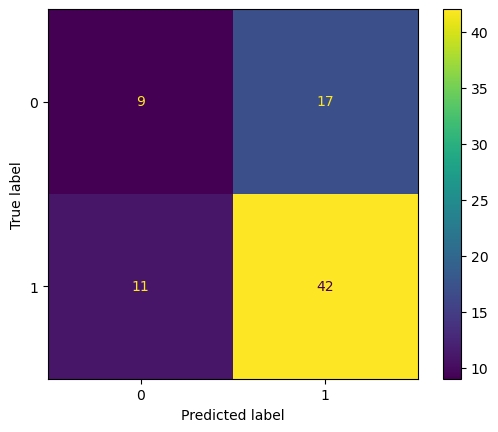

In [ ]:
model_lr = LogisticRegression(penalty='l2', random_state=99)

parameters_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1],  # inverso de la regularización L2 (menor C = más regularización)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para tratar desbalance
}

lr = model_trial(model_lr, parameters_lr)


---

## **Random Forest**

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


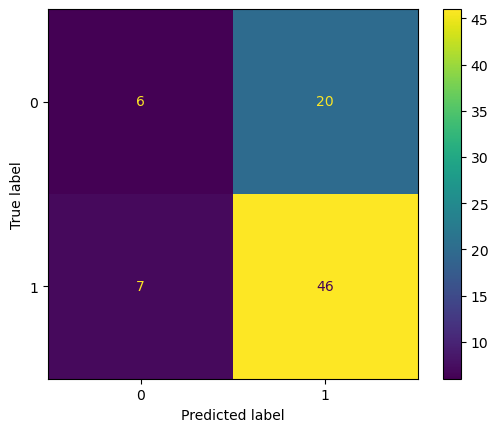

In [ ]:
model_rf = RandomForestClassifier(random_state=99)

parameters_rf = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # cantidad de árboles
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],  # profundidad máxima de cada árbol (más profundo = más complejo)
    'classifier__max_leaf_nodes': [4, 6, 8, 10, 12, 14, 16, 18, 20],  # máximo número de nodos internos (controla el tamaño del árbol)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para manejar desbalance
}

rf = model_trial(model_rf, parameters_rf)


---

## **XGBoost**


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


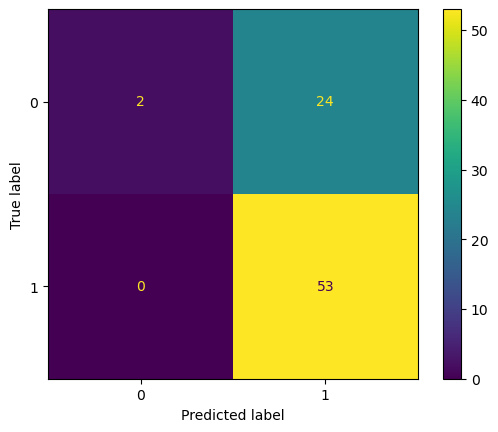

In [735]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

parameters_xgb = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # divisiones del modelo XGB
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # mínimo information gain por división
    'classifier__max_depth': [3, 4, 5, 6, 7],  # reducir la profundidad
    'classifier__min_child_weight': [4, 5, 6, 7],  # mayor peso = menos división
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7, 0.8],  # también baja un poco la complejidad
    'classifier__reg_alpha': [0.1, 0.5, 1],  # regularización L1
    'classifier__reg_lambda': [1, 2, 3],  # regularización L2
    'classifier__scale_pos_weight': [1, 1.5, 2]  # balanceo de clases para regresión logística
}

xgb = model_trial(model_xgb, parameters_xgb)

---

## **LightGBM**


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[LightGBM] [Info] Number of positive: 167, number of negative: 167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Ligh

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

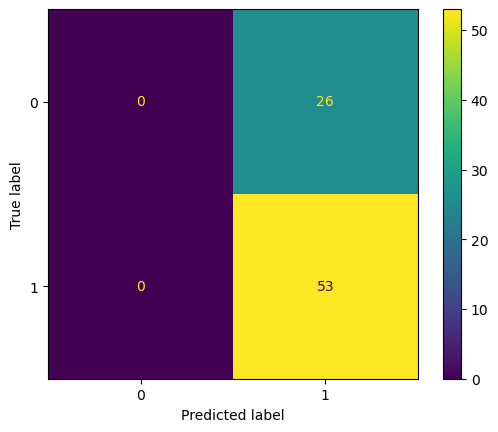

In [736]:
model_lgbm = LGBMClassifier(random_state=99)

parameters_lgbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [2, 3, 4, 5, 6],  # menos profundidad para evitar árboles muy especializados
    'classifier__learning_rate': [0.01, 0.05],  # más bajo = menos riesgo de overfit, pero más lento
    'classifier__num_leaves': [15, 31, 50],  # menos hojas = árboles menos complejos
    'classifier__min_child_samples': [20, 40, 60],  # aumentar mínimo para evitar divisiones por ruido
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7],  # también baja un poco la complejidad
    'classifier__scale_pos_weight': [1, 2, 3, 5],  # probá esto para clases desbalanceadas
    'classifier__reg_alpha': [0.0, 0.1, 0.5],  # regularización L1
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0]  # regularización L2
}

lgbm = model_trial(model_lgbm, parameters_lgbm)

---

## **Cat Boosting**

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


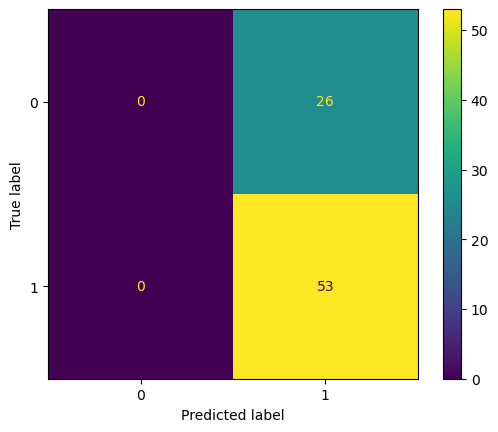

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, random_state=42)

parameters = {
    'classifier__iterations': [100, 200, 300, 400, 500],  # número total de árboles (iteraciones del boosting)
    'classifier__depth': [3, 4, 5, 6, 7],  # profundidad máxima de cada árbol
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # tasa de aprendizaje (más baja = entrenamiento más lento pero estable)
    'classifier__l2_leaf_reg': [3, 5, 7],  # regularización L2 para evitar overfitting
    'classifier__scale_pos_weight': [1, 5, 10]  # peso aplicado a la clase positiva para tratar desbalance
}

cb = model_trial(model, parameters)


----

In [738]:
def crear_tabla_resultados(lr, rf, xgb, lgbm, cb, scoring='recall'):

    df_funciones = pd.DataFrame()
    df_funciones["metodo"] = ["Regresión Logística", "Random Forest", "XGB", "LGBM", "CatBoost"]

    df_funciones["best_model"] = [lr[4], rf[4], xgb[4], lgbm[4], cb[4]]
    df_funciones["best_params"] = [lr[9], rf[9], xgb[9], lgbm[9], cb[9]]

    df_funciones["recall_train"] = [lr[5], rf[5], xgb[5], lgbm[5], cb[5]]
    df_funciones["recall"] = [lr[0], rf[0], xgb[0], lgbm[0], cb[0]]

    df_funciones["precision_train"] = [lr[8], rf[8], xgb[8], lgbm[8], cb[8]]
    df_funciones["precision"] = [lr[3], rf[3], xgb[3], lgbm[3], cb[3]]

    df_funciones["f1_train"] = [lr[7], rf[7], xgb[7], lgbm[7], cb[7]]
    df_funciones["f1"] = [lr[2], rf[2], xgb[2], lgbm[2], cb[2]]

    df_funciones["auc_roc_train"] = [lr[6], rf[6], xgb[6], lgbm[6], cb[6]]
    df_funciones["auc_roc"] = [lr[1], rf[1], xgb[1], lgbm[1], cb[1]]

    df_funciones = df_funciones.sort_values(by=scoring, ascending=False)

    return df_funciones

In [739]:
tabla = crear_tabla_resultados(lr, rf, xgb, lgbm, cb, scoring='recall')
display(tabla)

,metodo,best_model,best_params,recall_train,recall,precision_train,precision,f1_train,f1,auc_roc_train,auc_roc
2,XGB,"(passthrough, StandardScaler(), SelectKBest(k=...","{'selector__k': 15, 'sampler': 'passthrough', ...",0.995283,1.000000,0.705686,0.688312,0.825832,0.815385,0.574565,0.538462
3,LGBM,"(passthrough, StandardScaler(), SelectKBest(k=...","{'selector__k': 5, 'sampler': 'passthrough', '...",1.000000,1.000000,0.670886,0.670886,0.803030,0.803030,0.500000,0.500000
4,CatBoost,"(SMOTE(), StandardScaler(), SelectKBest(k=15),...","{'selector__k': 15, 'sampler': SMOTE(), 'class...",1.000000,1.000000,0.673016,0.670886,0.804554,0.803030,0.504808,0.500000
1,Random Forest,"(passthrough, StandardScaler(), SelectKBest(k=...","{'selector__k': 5, 'sampler': 'passthrough', '...",0.966981,0.867925,0.750916,0.696970,0.845361,0.773109,0.656567,0.549347
0,Regresión Logística,"(RandomOverSampler(), StandardScaler(), Select...","{'selector__k': 5, 'sampler': RandomOverSample...",0.811321,0.792453,0.774775,0.711864,0.792627,0.750000,0.665276,0.569303


In [740]:
def plot_roc_curves(lr, rf, xgb, lgbm, cb, X_test, y_test):

    modelos = {
        "Logistic Regression": lr[4],
        "Random Forest": rf[4],
        "XGBoost": xgb[4],
        "LightGBM": lgbm[4],
        "CatBoost": cb[4]
    }

    plt.figure(figsize=(9, 6))

    for nombre, modelo in modelos.items():
        # Probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

    # Línea de referencia (modelo aleatorio)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC comparativas')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

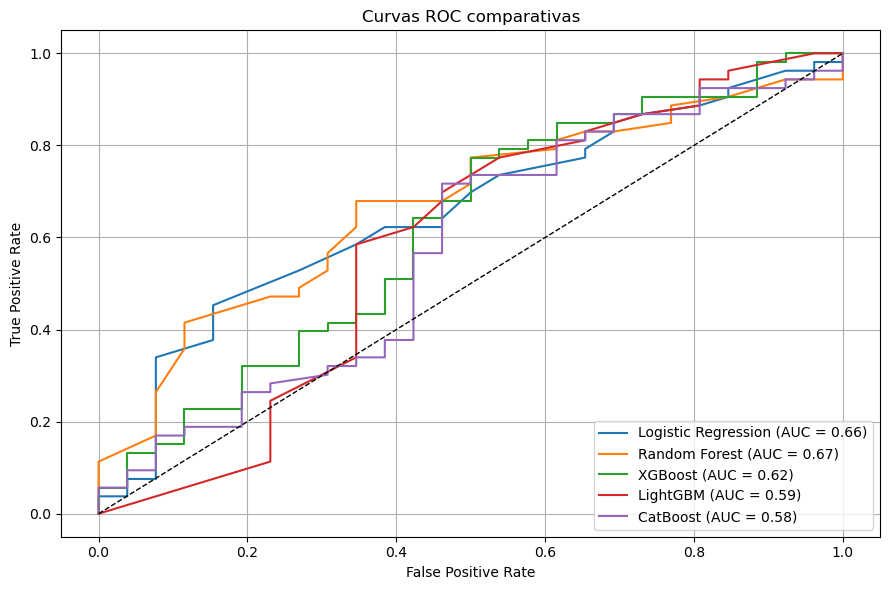

In [741]:
plot_roc_curves(lr, rf, xgb, lgbm, cb, X_test, y_test)


### 📊 Conclusiones del Desempeño de Modelos de Regresión

Luego de entrenar y evaluar distintos modelos para predecir el precio de propiedades, se observan los siguientes resultados en el conjunto de test:

| Modelo               | R² (Test) | RMSE (Test) | MAE (Test) |
|----------------------|-----------|-------------|------------|
| **XGBoost**          | 0.9952    | 0.0279      | 0.0152     |
| **LightGBM**         | 0.9854    | 0.0489      | 0.0256     |
| **Random Forest**    | 0.9675    | 0.0729      | 0.0386     |
| **Regresión Lineal** | 0.8855    | 0.1370      | 0.0863     |

---

### ✅ Observaciones clave

- **XGBoost** fue el mejor modelo, alcanzando un **R² de 0.995** en test, lo que indica que casi toda la varianza del precio es explicada por el modelo. Además, presenta el **menor error absoluto (MAE)** y **cuadrático (RMSE)**.
- **LightGBM** también mostró un rendimiento excelente, aunque levemente inferior a XGBoost.
- **Random Forest** ofrece buen desempeño, pero con errores más altos y menor capacidad explicativa que los modelos de boosting.
- **Regresión Lineal** obtuvo resultados aceptables (R² = 0.885), pero claramente no captura relaciones no lineales presentes en los datos.

---

### 🧠 Conclusión final

El uso de modelos **ensemble de boosting (XGBoost y LightGBM)** es altamente recomendable para este problema, ya que logran una **mejor generalización y menor error** sin signos claros de sobreajuste. Si se prioriza interpretabilidad, puede usarse regresión lineal como baseline, pero para **predicciones precisas de precios**, se justifica plenamente la mayor complejidad de los modelos no lineales.

